In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import h5py

import numpy as np
import pandas as pd

import glob

In [2]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [3]:
def plot_wavefields(preds, trues, errors,initial_timestep,timestep_to_plot):
    fig , axs = plt.subplots(len(timestep_to_plot),3,figsize=(10,len(timestep_to_plot)*2.7),squeeze=False)

    for row, ts in enumerate(timestep_to_plot):

        # True
        im = axs[row,1].imshow(trues[row,:,:],norm=MidpointNormalize(midpoint=0))

        clim = im.get_clim()

        divider = make_axes_locatable(axs[row,1])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')

        # Predictions
        im = axs[row,0].imshow(preds[row,:,:],norm=MidpointNormalize(midpoint=0),clim=clim)

        divider = make_axes_locatable(axs[row,0])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')
        
        axs[row,0].set_ylabel(f'Wavefield {ts}',fontsize=16)

        # Error
        im = axs[row,2].imshow(errors[row,:,:],norm=MidpointNormalize(midpoint=0))

        divider = make_axes_locatable(axs[row,2])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')

        axs[row,0].tick_params(left=False,bottom=False)
        axs[row,0].set(yticklabels=[],xticklabels=[])
        axs[row,0].set_frame_on(False)
        axs[row,1].axis('off')
        axs[row,2].axis('off')

        if row == 0:
            axs[row,0].set_title(f'Prediction',fontsize=16)
            axs[row,1].set_title(f'True',fontsize=16)
            axs[row,2].set_title(f'Error',fontsize=16)
    
    plt.tight_layout()
    #fig.suptitle(f'Initital wavefield n°{initial_timestep} = 0.00 [s]', fontsize=30, y=1.02)

In [5]:
error = np.load('unet_errors_L2_E500.npy')
trues = np.load('unet_trues_L2_E500.npy')
preds = np.load('unet_preds_L2_E500.npy')

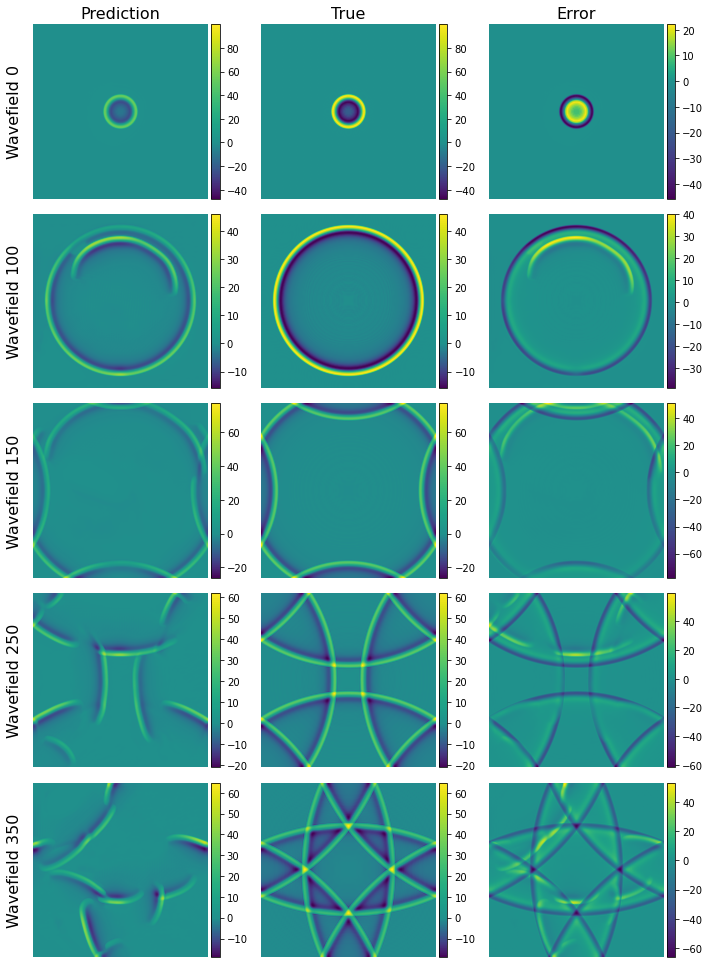

In [6]:
plot_wavefields(preds, trues, error, 20, [0,100,150,250,350])

In [16]:
df_preds = pd.read_csv('model_comparison/unet_L2_E500.csv',index_col=0,usecols=['time','receivers_pred'])['receivers_pred'].str.replace(']','').str.replace('[','').str.replace('\n','').str.rstrip().str.lstrip().str.split('\s+',expand=True).astype(float)
df_trues = pd.read_csv('model_comparison/unet_L2_E500.csv',index_col=0,usecols=['time','receivers_true'])['receivers_true'].str.replace(']','').str.replace('[','').str.replace('\n','').str.rstrip().str.lstrip().str.split('\s+',expand=True).astype(float)

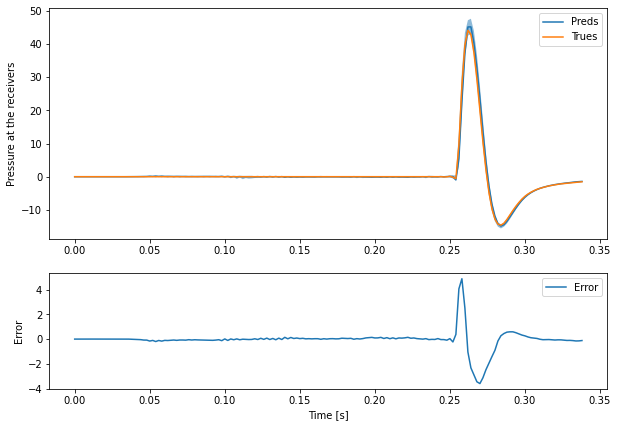

In [18]:
fig = plt.figure(figsize=(10,7))

spec = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[2, 1])

ax0 = fig.add_subplot(spec[0])
ax0.fill_between(df_preds.index,df_preds.max(axis=1),df_preds.min(axis=1),alpha=0.5)
ax0.plot(df_preds.index,df_preds.median(axis=1),label='Preds')

ax0.fill_between(df_trues.index,df_trues.max(axis=1),df_trues.min(axis=1),alpha=0.5)
ax0.plot(df_trues.index,df_trues.median(axis=1),label='Trues')
ax0.set_ylabel('Pressure at the receivers')
ax0.legend()

ax1 = fig.add_subplot(spec[1])
ax1.plot(df_preds.index,df_trues.median(axis=1)-df_preds.median(axis=1),label='Error')
ax1.set_ylabel('Error')
ax1.set_xlabel('Time [s]')

ax1.legend()

<AxesSubplot:>

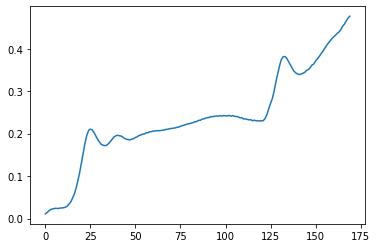

In [21]:
pd.read_csv('model_comparison/unet_L2_E500.csv',index_col=0)['avg_abs_error'].plot()